<a href="https://colab.research.google.com/github/Neha-Niharika-Kar/SmartKnower-DS-May-MajorProject/blob/main/COVID-19-Pandemic-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***COVID-19 PANDEMIC ANALYSIS***

---



**DATA SCIENCE - MAJOR PROJECT - by Neha Niharika Kar**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the dataset
covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/owid_covid19_data.csv')
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101338,ZWE,Africa,Zimbabwe,05-07-2021,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,128.575,2.220,3635.0,687102.0,0.165,1369436.0,797715.0,571721.0,8226.0
101339,ZWE,Africa,Zimbabwe,06-07-2021,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,130.459,1.884,10598.0,697700.0,0.172,1382567.0,807633.0,574934.0,13131.0
101340,ZWE,Africa,Zimbabwe,07-07-2021,60227.0,2264.0,1480.429,1973.0,34.0,26.286,4052.163,152.325,132.746,2.288,10362.0,708062.0,0.190,1398757.0,819058.0,579699.0,16190.0
101341,ZWE,Africa,Zimbabwe,08-07-2021,62383.0,2156.0,1594.571,2029.0,56.0,31.571,4197.222,145.059,136.514,3.768,12811.0,720873.0,0.198,1433578.0,848808.0,584770.0,34821.0


# **Data Preprocessing**

In [4]:
covid.drop(['iso_code', 'continent'], axis=1, inplace=True)

In [5]:
covid.rename(columns = {'location': 'country'}, inplace=True)

In [6]:
covid = covid[covid.country != 'World']

In [7]:
covid = covid[covid.country != 'Asia']

In [8]:
covid = covid[covid.country != 'Europe']

In [9]:
covid = covid[covid.country != 'Africa']

In [10]:
covid = covid[covid.country != 'North America']

In [11]:
covid = covid[covid.country != 'South America']

In [12]:
covid = covid[covid.country != 'European Union']

In [13]:
covid.duplicated().sum()

0

In [14]:
covid.isnull().sum()

country                         0
date                            0
total_cases                  3750
new_cases                    3757
new_cases_smoothed           4725
total_deaths                13821
new_deaths                  13786
new_deaths_smoothed          4725
total_cases_per_million      4269
new_cases_per_million        4276
total_deaths_per_million    14327
new_deaths_per_million      14292
new_tests                   52136
total_tests                 52468
positive_rate               48143
total_vaccinations          81572
people_vaccinated           82416
people_fully_vaccinated     85150
new_vaccinations            84463
dtype: int64

In [15]:
covid.fillna(0.0, inplace=True)

In [16]:
covid.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,Afghanistan,24-02-2020,1.0,1.0,0.0,0.0,0.0,0.0,0.026,0.026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,25-02-2020,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,26-02-2020,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,27-02-2020,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,28-02-2020,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
covid.shape

(97653, 19)

In [18]:
covid.dtypes

country                      object
date                         object
total_cases                 float64
new_cases                   float64
new_cases_smoothed          float64
total_deaths                float64
new_deaths                  float64
new_deaths_smoothed         float64
total_cases_per_million     float64
new_cases_per_million       float64
total_deaths_per_million    float64
new_deaths_per_million      float64
new_tests                   float64
total_tests                 float64
positive_rate               float64
total_vaccinations          float64
people_vaccinated           float64
people_fully_vaccinated     float64
new_vaccinations            float64
dtype: object

In [19]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
count,9.765300e+04,97653.000000,97653.000000,97653.000000,97653.000000,97653.000000,97653.000000,97653.000000,97653.000000,97653.000000,9.765300e+04,9.765300e+04,97653.000000,9.765300e+04,9.765300e+04,9.765300e+04,9.765300e+04
mean,3.437613e+05,1901.073894,1886.829555,8237.274738,41.167614,40.909719,12787.558395,72.416226,247.600455,1.299382,2.254971e+04,3.707341e+06,0.044833,1.866245e+06,8.385472e+05,3.987884e+05,3.119352e+04
std,1.849178e+06,11080.097648,10881.018590,37044.562444,197.991567,187.749394,24349.491223,199.190850,503.010558,3.735946,1.232162e+05,2.403182e+07,0.082105,2.577655e+07,8.355975e+06,4.479233e+06,4.820931e+05
min,0.000000e+00,-74347.000000,-6223.000000,0.000000,-1918.000000,-232.143000,0.000000,-2153.437000,0.000000,-76.445000,-2.391720e+05,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.200000e+02,1.000000,4.143000,11.000000,0.000000,0.000000,180.753000,0.006000,2.287000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.072900e+04,50.000000,60.571000,171.000000,0.000000,0.857000,1500.176000,6.045000,26.045000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.110770e+05,601.000000,626.000000,2048.000000,10.000000,10.000000,12628.275000,61.464000,218.674000,0.854000,5.227000e+03,6.695180e+05,0.054000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.383875e+07,414188.000000,391232.000000,606993.000000,7374.000000,4190.000000,182165.275000,18293.675000,5881.048000,218.329000,3.740296e+06,4.721836e+08,0.933000,1.365463e+09,6.220000e+08,2.232990e+08,2.474100e+07


In [20]:
covid['date'] = pd.to_datetime(covid['date'])

In [21]:
covid.tail()

,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
101338,Zimbabwe,2021-05-07,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,128.575,2.220,3635.0,687102.0,0.165,1369436.0,797715.0,571721.0,8226.0
101339,Zimbabwe,2021-06-07,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,130.459,1.884,10598.0,697700.0,0.172,1382567.0,807633.0,574934.0,13131.0
101340,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,4052.163,152.325,132.746,2.288,10362.0,708062.0,0.190,1398757.0,819058.0,579699.0,16190.0
101341,Zimbabwe,2021-08-07,62383.0,2156.0,1594.571,2029.0,56.0,31.571,4197.222,145.059,136.514,3.768,12811.0,720873.0,0.198,1433578.0,848808.0,584770.0,34821.0
101342,Zimbabwe,2021-09-07,65066.0,2683.0,1771.857,2084.0,55.0,34.714,4377.738,180.516,140.215,3.700,0.0,0.0,0.000,1464065.0,875182.0,588883.0,30487.0


In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97653 entries, 0 to 101342
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   97653 non-null  object        
 1   date                      97653 non-null  datetime64[ns]
 2   total_cases               97653 non-null  float64       
 3   new_cases                 97653 non-null  float64       
 4   new_cases_smoothed        97653 non-null  float64       
 5   total_deaths              97653 non-null  float64       
 6   new_deaths                97653 non-null  float64       
 7   new_deaths_smoothed       97653 non-null  float64       
 8   total_cases_per_million   97653 non-null  float64       
 9   new_cases_per_million     97653 non-null  float64       
 10  total_deaths_per_million  97653 non-null  float64       
 11  new_deaths_per_million    97653 non-null  float64       
 12  new_tests        

In [23]:
covid.nunique()

country                       224
date                          556
total_cases                 50779
new_cases                   10033
new_cases_smoothed          21878
total_deaths                17652
new_deaths                   1511
new_deaths_smoothed          4524
total_cases_per_million     72371
new_cases_per_million       39829
total_deaths_per_million    44691
new_deaths_per_million       7188
new_tests                   24456
total_tests                 44192
positive_rate                 570
total_vaccinations          15631
people_vaccinated           14657
people_fully_vaccinated     11814
new_vaccinations            11444
dtype: int64

In [24]:
covid.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
total_cases,1.000000,0.657612,0.681718,0.928678,0.658335,0.702318,0.266422,0.102325,0.291202,0.121565,0.719968,0.875084,0.064734,0.370028,0.772512,0.733574,0.234473
new_cases,0.657612,1.000000,0.981105,0.598220,0.811655,0.805302,0.141863,0.185522,0.164434,0.163162,0.715899,0.572636,0.134378,0.165251,0.394394,0.240338,0.134926
new_cases_smoothed,0.681718,0.981105,1.000000,0.616478,0.810666,0.837209,0.147820,0.163151,0.169720,0.155830,0.724029,0.590283,0.135395,0.173304,0.412994,0.252536,0.137297
total_deaths,0.928678,0.598220,0.616478,1.000000,0.689598,0.735323,0.277870,0.107150,0.423874,0.182047,0.625990,0.750498,0.111874,0.320439,0.656537,0.659401,0.201503
new_deaths,0.658335,0.811655,0.810666,0.689598,1.000000,0.948207,0.157659,0.158300,0.258103,0.323557,0.601947,0.488301,0.190001,0.157785,0.373928,0.240958,0.128644
new_deaths_smoothed,0.702318,0.805302,0.837209,0.735323,0.948207,1.000000,0.169728,0.147982,0.276924,0.276564,0.613409,0.521918,0.194659,0.170988,0.404793,0.261120,0.135806
total_cases_per_million,0.266422,0.141863,0.147820,0.277870,0.157659,0.169728,1.000000,0.437762,0.791122,0.357586,0.171535,0.195135,0.169515,0.077134,0.173942,0.194081,0.040636
new_cases_per_million,0.102325,0.185522,0.163151,0.107150,0.158300,0.147982,0.437762,1.000000,0.310080,0.497788,0.101972,0.063371,0.282494,0.004533,0.027927,0.021509,0.004168
total_deaths_per_million,0.291202,0.164434,0.169720,0.423874,0.258103,0.276924,0.791122,0.310080,1.000000,0.443341,0.176206,0.187896,0.226475,0.077427,0.177258,0.192159,0.044508
new_deaths_per_million,0.121565,0.163162,0.155830,0.182047,0.323557,0.276564,0.357586,0.497788,0.443341,1.000000,0.089635,0.054688,0.342488,0.005494,0.030757,0.022639,0.007027


In [25]:
covid.to_csv('owid_covid19_editeddata.csv', index=False)

# **Data Visualization**

In [26]:
covid_cases = covid.groupby(by='country').sum()['total_cases'].sort_values(ascending=False).reset_index()

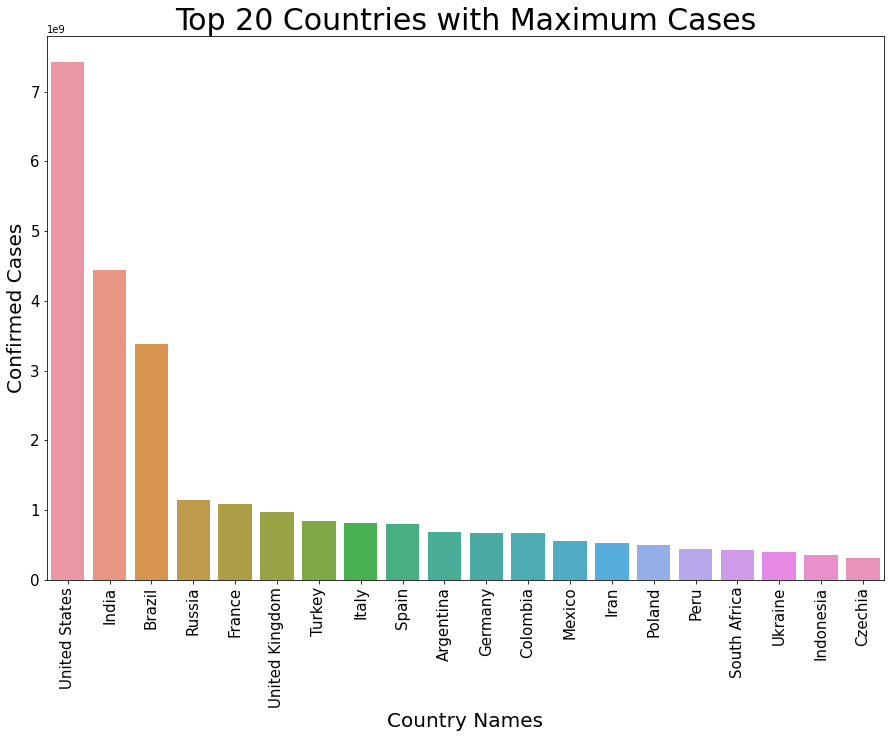

In [27]:
plt.figure(figsize = (15,10))
plt.title('Top 20 Countries with Maximum Cases', size=30)
sns.barplot(x='country', y='total_cases', data=covid_cases.head(20)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Confirmed Cases', size=20)
plt.show()

US has the maximum number of Covid positive cases, followed by India and Brazil.


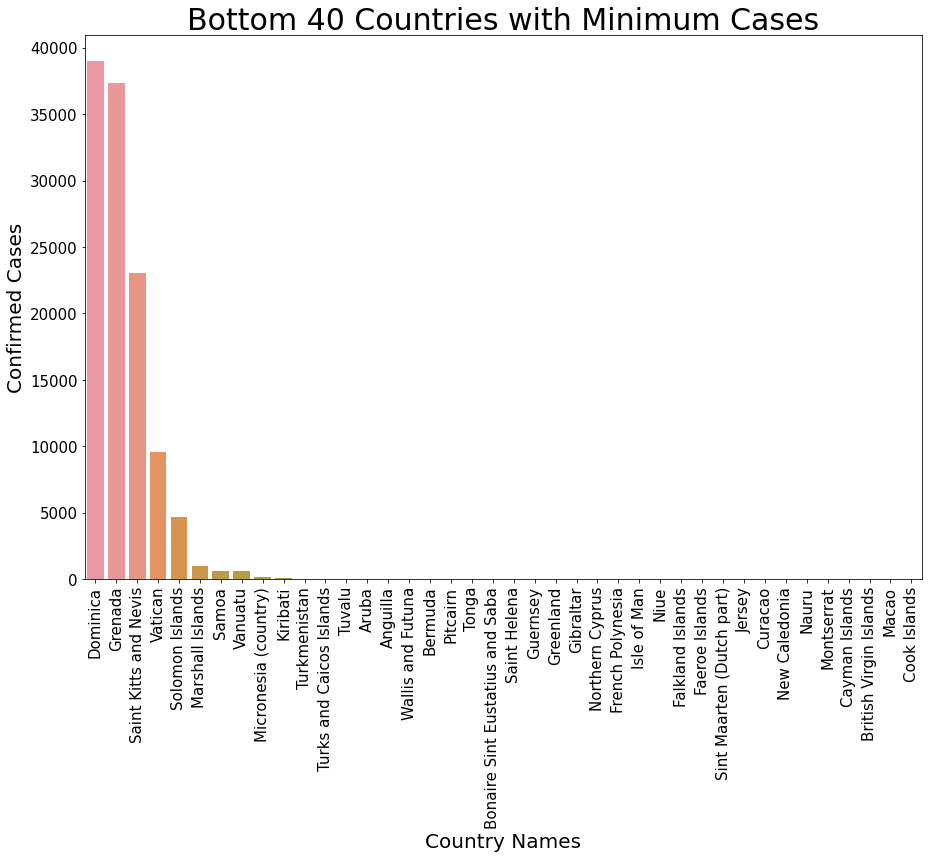

In [28]:
plt.figure(figsize = (15,10))
plt.title('Bottom 40 Countries with Minimum Cases', size=30)
sns.barplot(x='country', y='total_cases', data=covid_cases.tail(40)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Confirmed Cases', size=20)
plt.show()

Kiribati has the least Covid positive cases, followed by Micronesia and Vanuatu.
>
Many countries have zero COVID-19 cases.


In [29]:
death_cases = covid.groupby(by='country').sum()['total_deaths'].sort_values(ascending=False).reset_index()

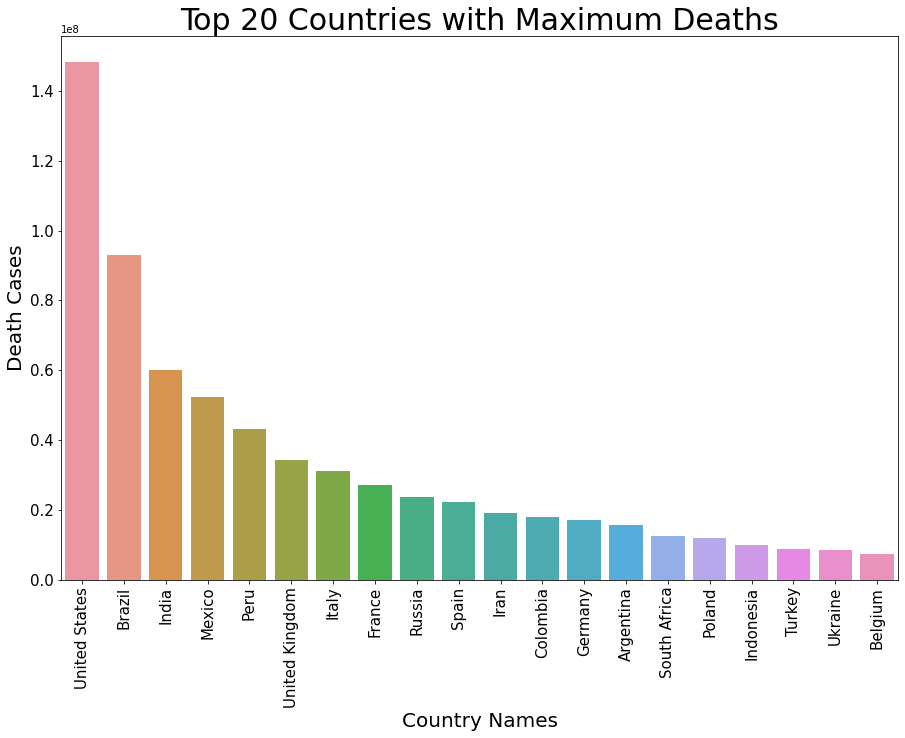

In [30]:
plt.figure(figsize = (15,10))
plt.title('Top 20 Countries with Maximum Deaths', size=30)
sns.barplot(x='country', y='total_deaths', data=death_cases.head(20)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Death Cases', size=20)
plt.show()

US has the highest Covid related deaths, followed by Brazil and India.

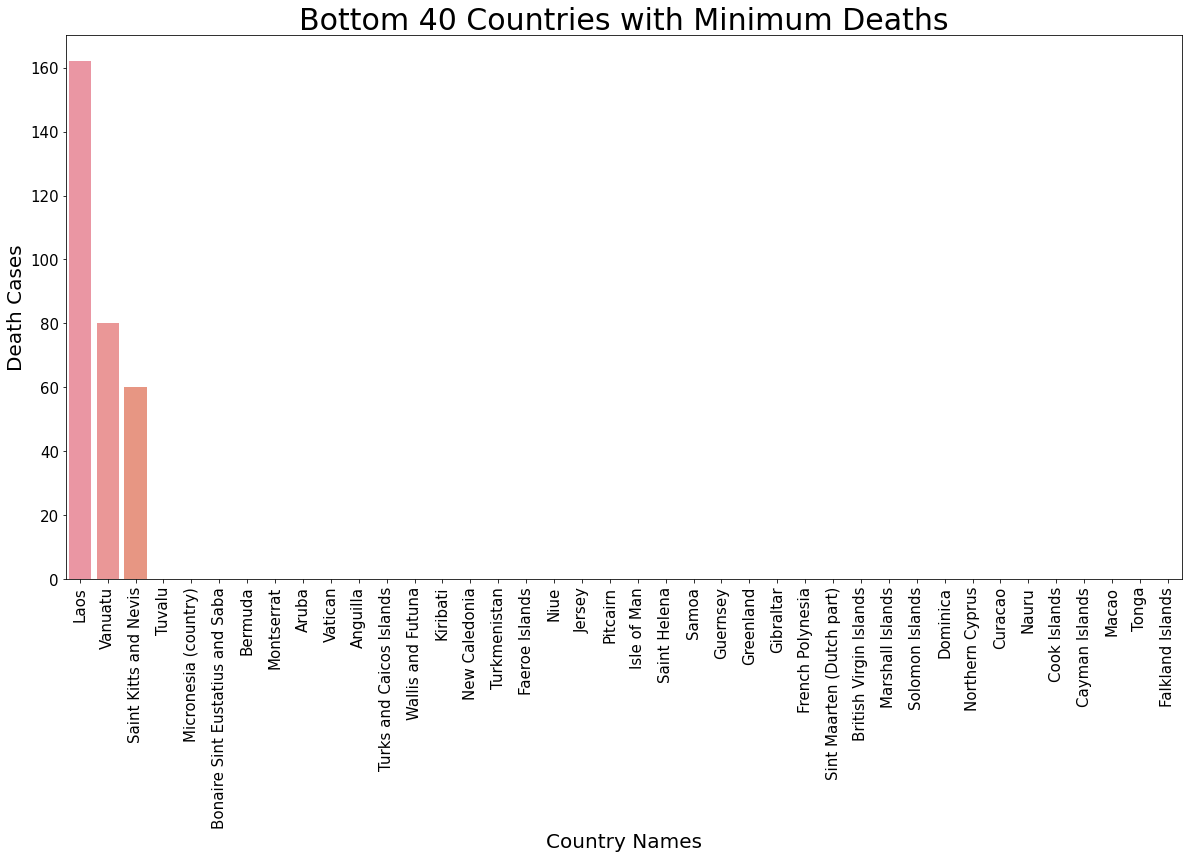

In [31]:
plt.figure(figsize = (20,10))
plt.title('Bottom 40 Countries with Minimum Deaths', size=30)
sns.barplot(x='country', y='total_deaths', data=death_cases.tail(40)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Death Cases', size=20)
plt.show()

Saint Kitts and Nevis has the least Covid related deaths, followed by Vanuatu and Laos.
> 
Many countries have 0 death toll related to COVID-19.


In [32]:
vaccinations_done = covid.groupby(by='country').sum()['total_vaccinations'].sort_values(ascending=False).reset_index()

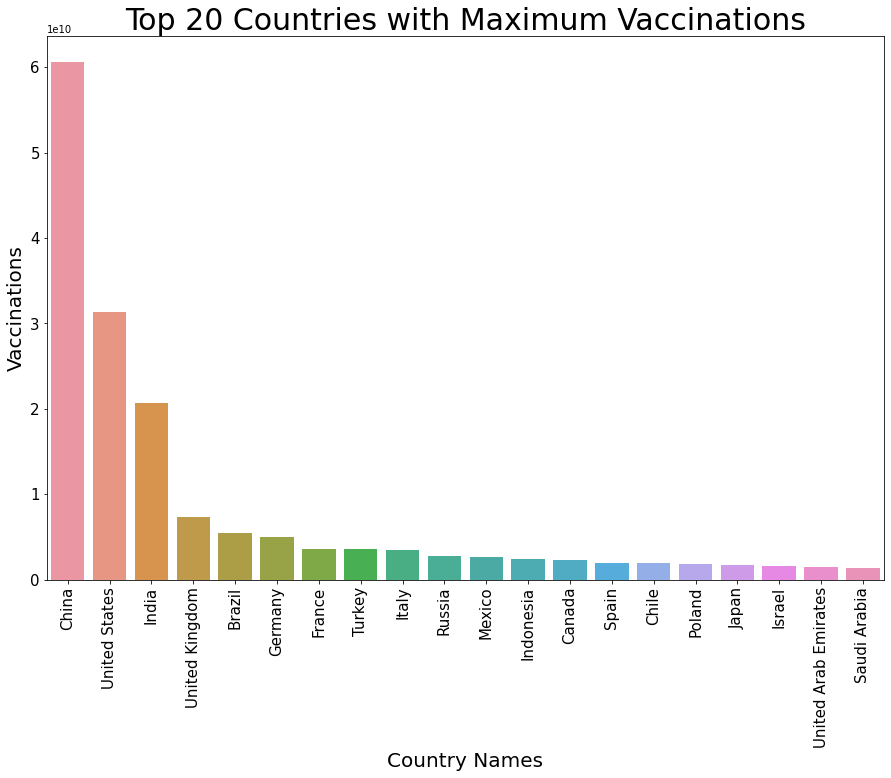

In [33]:
plt.figure(figsize = (15,10))
plt.title('Top 20 Countries with Maximum Vaccinations', size=30)
sns.barplot(x='country', y='total_vaccinations', data=vaccinations_done.head(20)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Vaccinations', size=20)
plt.show()

China leads the world in terms of vaccinations done, followed by US and India.


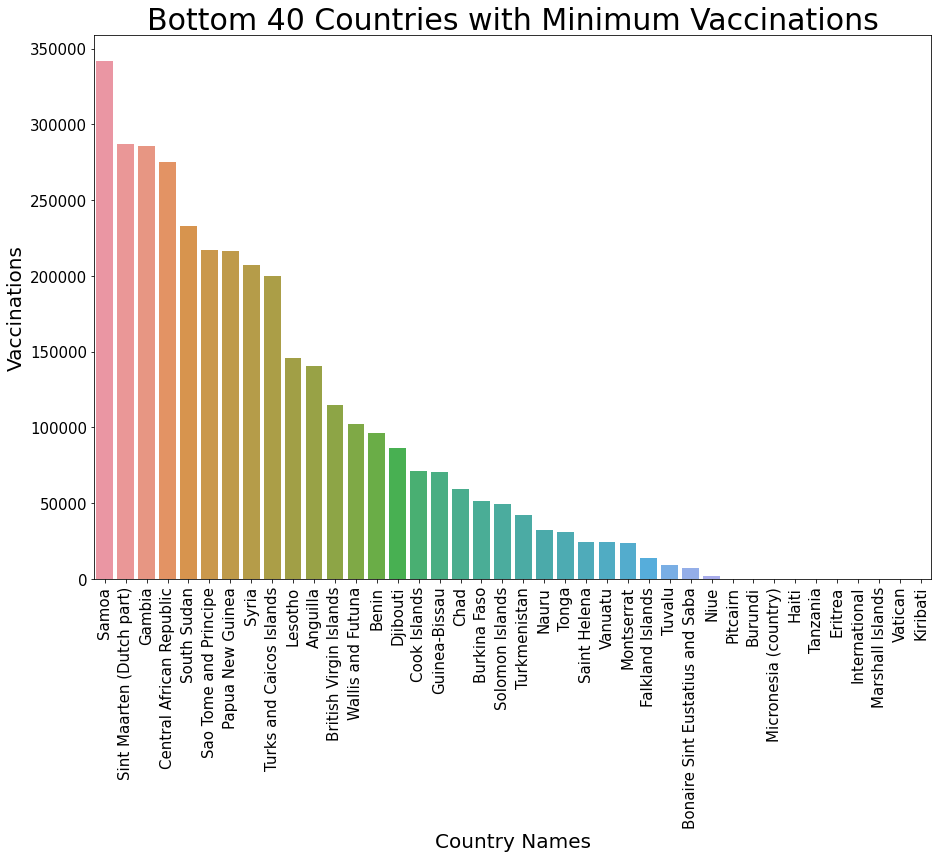

In [34]:
plt.figure(figsize = (15,10))
plt.title('Bottom 40 Countries with Minimum Vaccinations', size=30)
sns.barplot(x='country', y='total_vaccinations', data=vaccinations_done.tail(40)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Vaccinations', size=20)
plt.show()

Niue has the least vaccinations done till now.
> 
Many countries have not started their vaccination drive yet.


In [35]:
tests_done = covid.groupby(by='country').sum()['total_tests'].sort_values(ascending=False).reset_index()

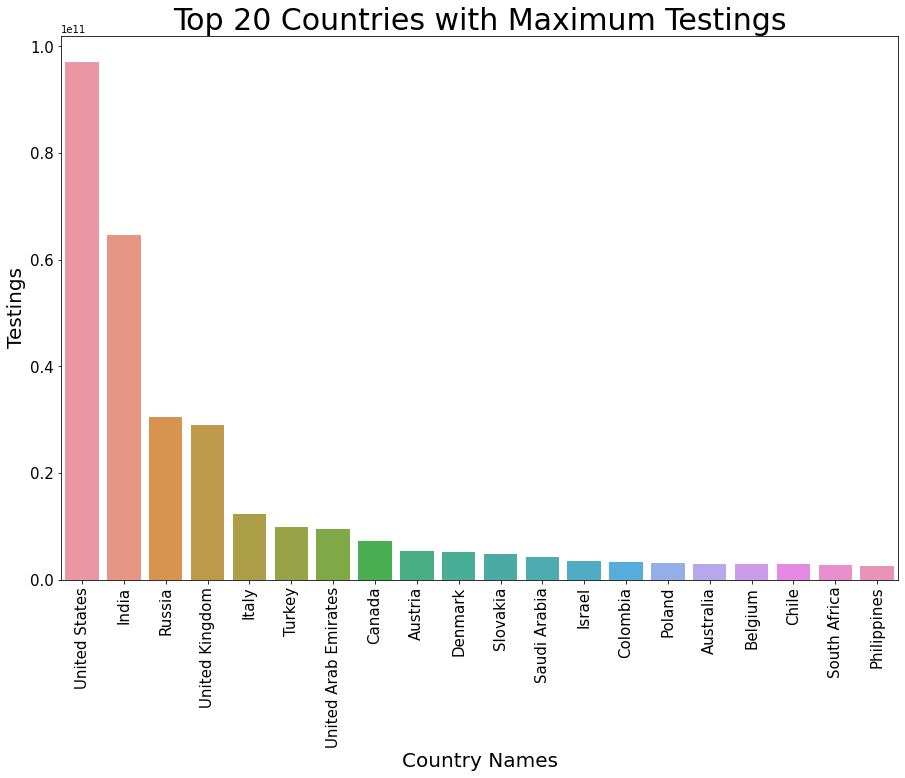

In [36]:
plt.figure(figsize = (15,10))
plt.title('Top 20 Countries with Maximum Testings', size=30)
sns.barplot(x='country', y='total_tests', data=tests_done.head(20)) 
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel('Country Names', size=20)
plt.ylabel('Testings', size=20)
plt.show()

US has done the maximum testings for Covid cases, followed by India and Russia.

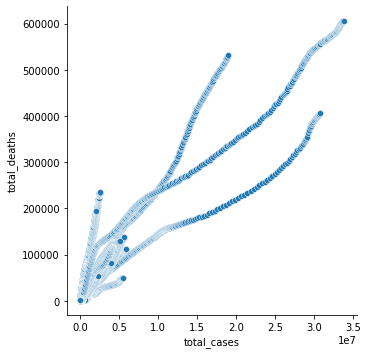

In [37]:
sns.relplot(x='total_cases', y='total_deaths', data=covid)

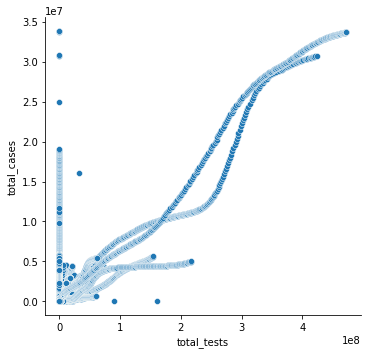

In [39]:
sns.relplot(x='total_tests', y='total_cases', data=covid)

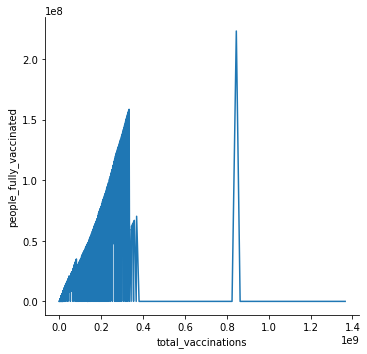

In [40]:
sns.relplot(x='total_vaccinations', y='people_fully_vaccinated', kind='line', data=covid)

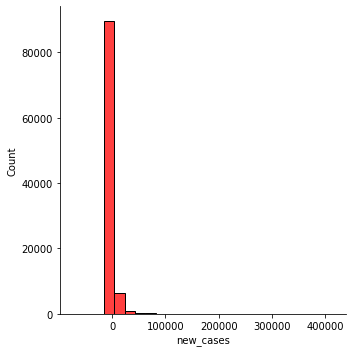

In [44]:
sns.displot(covid['new_cases'], bins=25, color='red')

# **Time Series Forecasting for 30 Days**

In [45]:
from fbprophet import Prophet

**Cases**

In [46]:
cases = covid.groupby('date').sum()['total_cases'].reset_index()

In [47]:
cases.columns = ['ds','y']
cases['ds'] = pd.to_datetime(cases['ds'])

In [48]:
cases

,ds,y
0,2020-01-01,0.0
1,2020-01-02,12050.0
2,2020-01-03,88422.0
3,2020-01-04,964205.0
4,2020-01-05,3376581.0
...,...,...
551,2021-12-02,108310940.0
552,2021-12-03,119098687.0
553,2021-12-04,136707352.0
554,2021-12-05,160500526.0


In [49]:
model1 = Prophet(changepoint_prior_scale=0.2)
model1.fit(cases.head(500))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
x = model1.make_future_dataframe(periods=30, freq='D')
forecast_cases = model1.predict(x)

In [51]:
forecast_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,5.814306e+06,-1.825287e+07,3.094630e+07
1,2020-01-02,5.235232e+06,-2.047505e+07,2.891144e+07
2,2020-01-03,5.501590e+06,-1.821508e+07,3.026170e+07
3,2020-01-04,5.885638e+06,-1.912692e+07,3.154933e+07
4,2020-01-05,7.683955e+06,-1.508610e+07,3.090011e+07
...,...,...,...,...
525,2021-07-09,1.758683e+08,1.537971e+08,2.018000e+08
526,2021-07-10,1.766384e+08,1.537214e+08,2.008483e+08
527,2021-07-11,1.788228e+08,1.545735e+08,2.020440e+08
528,2021-07-12,1.760443e+08,1.530686e+08,1.999215e+08


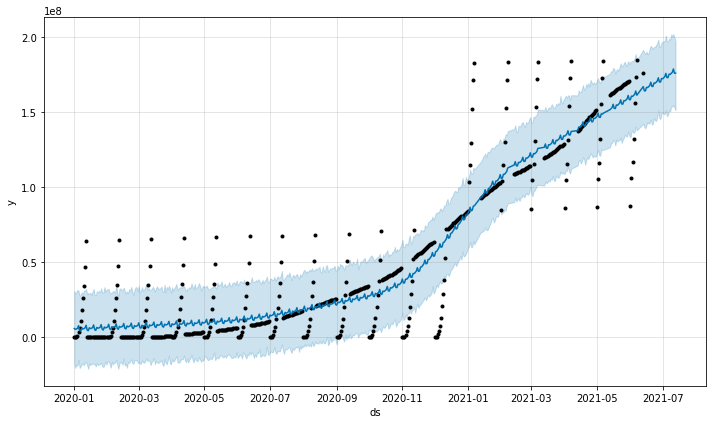

In [52]:
cases_forecast_plot = model1.plot(forecast_cases)

There were very low cases from January 2020 to April 2020. Ever since, cases started increasing steadily. There is a sharp increase in the number of cases between September 2020 and May 2021. 
> 
In the upcoming days, cases are expected to increase a bit and may become constant.

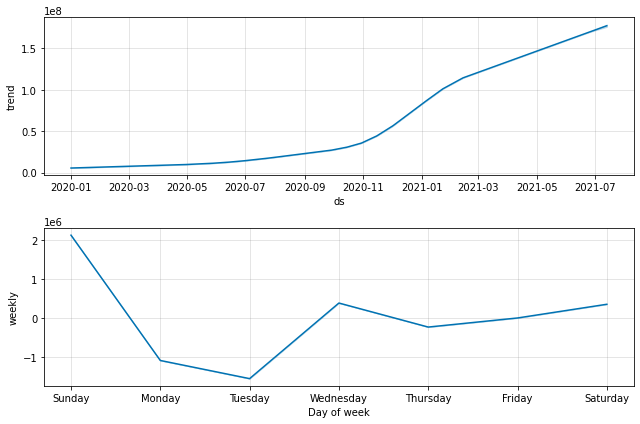

In [53]:
cases_forecast = model1.plot_components(forecast_cases)

More cases are found in the weekends, may be because of more testings on holidays.

**Deaths**

In [54]:
deaths = covid.groupby('date').sum()['total_deaths'].reset_index()

In [55]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [56]:
deaths

,ds,y
0,2020-01-01,0.0
1,2020-01-02,259.0
2,2020-01-03,2997.0
3,2020-01-04,50672.0
4,2020-01-05,246804.0
...,...,...
551,2021-12-02,2456288.0
552,2021-12-03,2723666.0
553,2021-12-04,3044616.0
554,2021-12-05,3442382.0


In [57]:
model2 = Prophet(changepoint_prior_scale=0.2)
model2.fit(deaths.head(500))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
y = model2.make_future_dataframe(periods=30, freq='D')
forecast_deaths = model2.predict(y)

In [59]:
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,1.974052e+05,-3.538041e+05,7.240388e+05
1,2020-01-02,1.838892e+05,-3.755975e+05,7.408953e+05
2,2020-01-03,1.879659e+05,-3.556027e+05,7.342299e+05
3,2020-01-04,1.973283e+05,-3.474762e+05,7.372114e+05
4,2020-01-05,2.415249e+05,-2.866305e+05,7.842482e+05
...,...,...,...,...
525,2021-07-09,3.815706e+06,3.261254e+06,4.384252e+06
526,2021-07-10,3.832623e+06,3.318062e+06,4.347857e+06
527,2021-07-11,3.884373e+06,3.308106e+06,4.440355e+06
528,2021-07-12,3.824348e+06,3.236786e+06,4.359901e+06


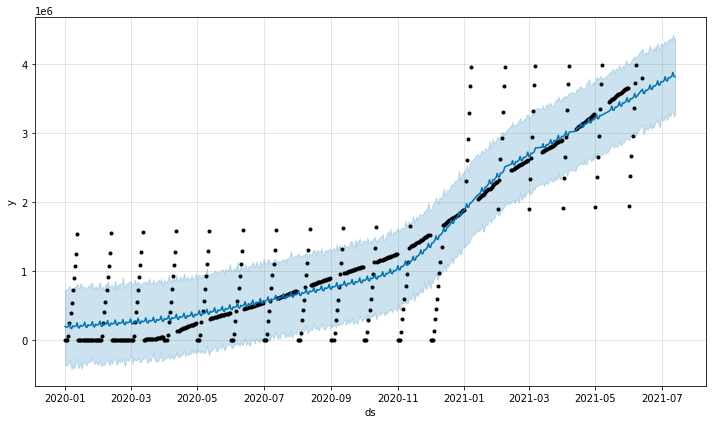

In [60]:
deaths_forecast_plot = model2.plot(forecast_deaths)

There were not much deaths until March 2020. Then death toll started increasing very steadily from April 2020 to June 2021.
> 
Death toll will increase a bit and may reach a constant value in the upcoming days.

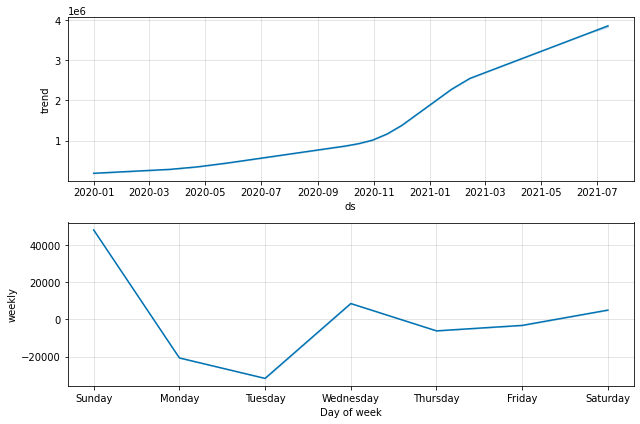

In [61]:
deaths_forecast = model2.plot_components(forecast_deaths)

Deaths are low on Tuesdays and high on Weekends.

**Vaccinations**

In [62]:
vaccinations = covid.groupby('date').sum()['total_vaccinations'].reset_index()

In [63]:
vaccinations.columns = ['ds','y']
vaccinations['ds'] = pd.to_datetime(vaccinations['ds'])

In [64]:
vaccinations

,ds,y
0,2020-01-01,0.000000e+00
1,2020-01-02,0.000000e+00
2,2020-01-03,0.000000e+00
3,2020-01-04,0.000000e+00
4,2020-01-05,0.000000e+00
...,...,...
551,2021-12-02,1.161898e+08
552,2021-12-03,2.719226e+08
553,2021-12-04,7.798947e+08
554,2021-12-05,1.297232e+09


In [65]:
model3 = Prophet(changepoint_prior_scale=0.3)
model3.fit(vaccinations.head(500))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
z = model3.make_future_dataframe(periods=30, freq='D')
forecast_vaccinations = model3.predict(z)

In [67]:
forecast_vaccinations[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,2.013202e+06,-4.603660e+08,4.083668e+08
1,2020-01-02,2.937763e+06,-4.154125e+08,4.827940e+08
2,2020-01-03,-1.146835e+07,-4.701114e+08,3.933418e+08
3,2020-01-04,-2.109155e+07,-4.777690e+08,3.922100e+08
4,2020-01-05,4.127711e+07,-4.016241e+08,4.878886e+08
...,...,...,...,...
525,2021-07-09,1.746419e+09,1.314972e+09,2.178378e+09
526,2021-07-10,1.746383e+09,1.300575e+09,2.158412e+09
527,2021-07-11,1.818339e+09,1.387102e+09,2.306612e+09
528,2021-07-12,1.770360e+09,1.308325e+09,2.219142e+09


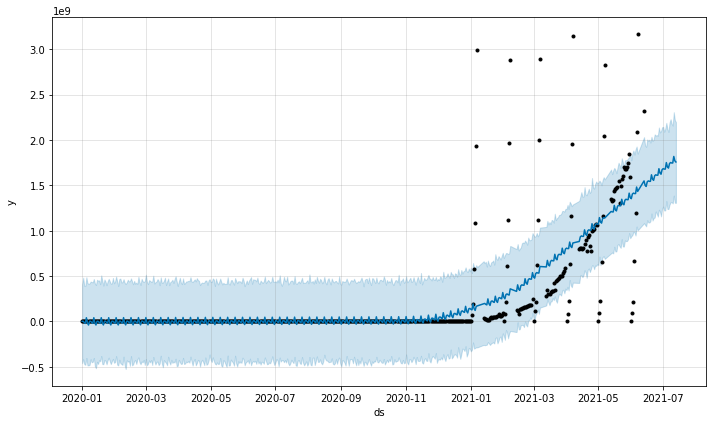

In [68]:
vaccinations_forecast_plot = model3.plot(forecast_vaccinations)

There were no vaccinations till January 2021. After that when vaccines were ready, most of the countries launched their vaccination drives and this saw a steep increase in the vaccines given to people. 
> 
Vaccinations are gonna increase steadily in the days to come, as many new vaccines are being launched and people are being aware.


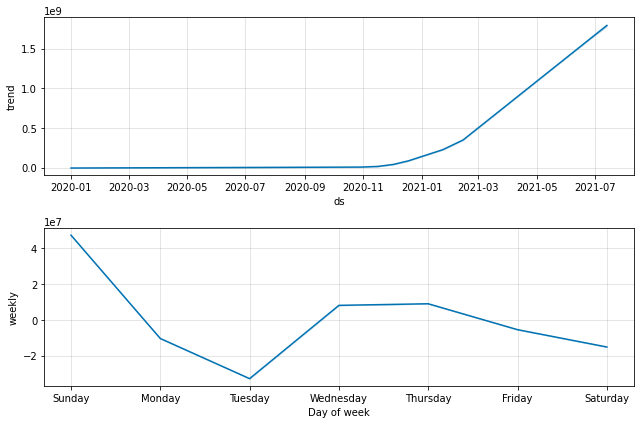

In [69]:
vaccinations_forecast = model3.plot_components(forecast_vaccinations)